In [12]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 

In [14]:
df = pd.read_csv('cleaned_data.csv')

In [15]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [16]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [17]:
from sklearn.linear_model import LogisticRegression
my_new_lr1 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
my_new_lr1.fit(X1_train, y1_train)

LogisticRegression(multi_class='ovr')

In [18]:
from sklearn.linear_model import LogisticRegression
my_new_lr2 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
my_new_lr2.fit(X2_train, y2_train)

LogisticRegression(multi_class='ovr')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [19]:
y_pred_proba1 = my_new_lr1.predict_proba(X1_test)
pos_proba1 = y_pred_proba1[:,1]
pos_proba1

array([0.25173051, 0.4157029 , 0.2039552 , ..., 0.4157029 , 0.17278475,
       0.33606547])

In [20]:
y_pred_proba2 = my_new_lr2.predict_proba(X2_test)
pos_proba2 = y_pred_proba2[:,1]
pos_proba2

array([0.22539786, 0.22539786, 0.20959039, ..., 0.20959039, 0.20959039,
       0.20959039])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [28]:
from sklearn import metrics

In [29]:
metrics.roc_auc_score(y1_test, pos_proba1)

0.6201990844642832

In [30]:
metrics.roc_auc_score(y2_test, pos_proba2)

0.5434650477972642

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

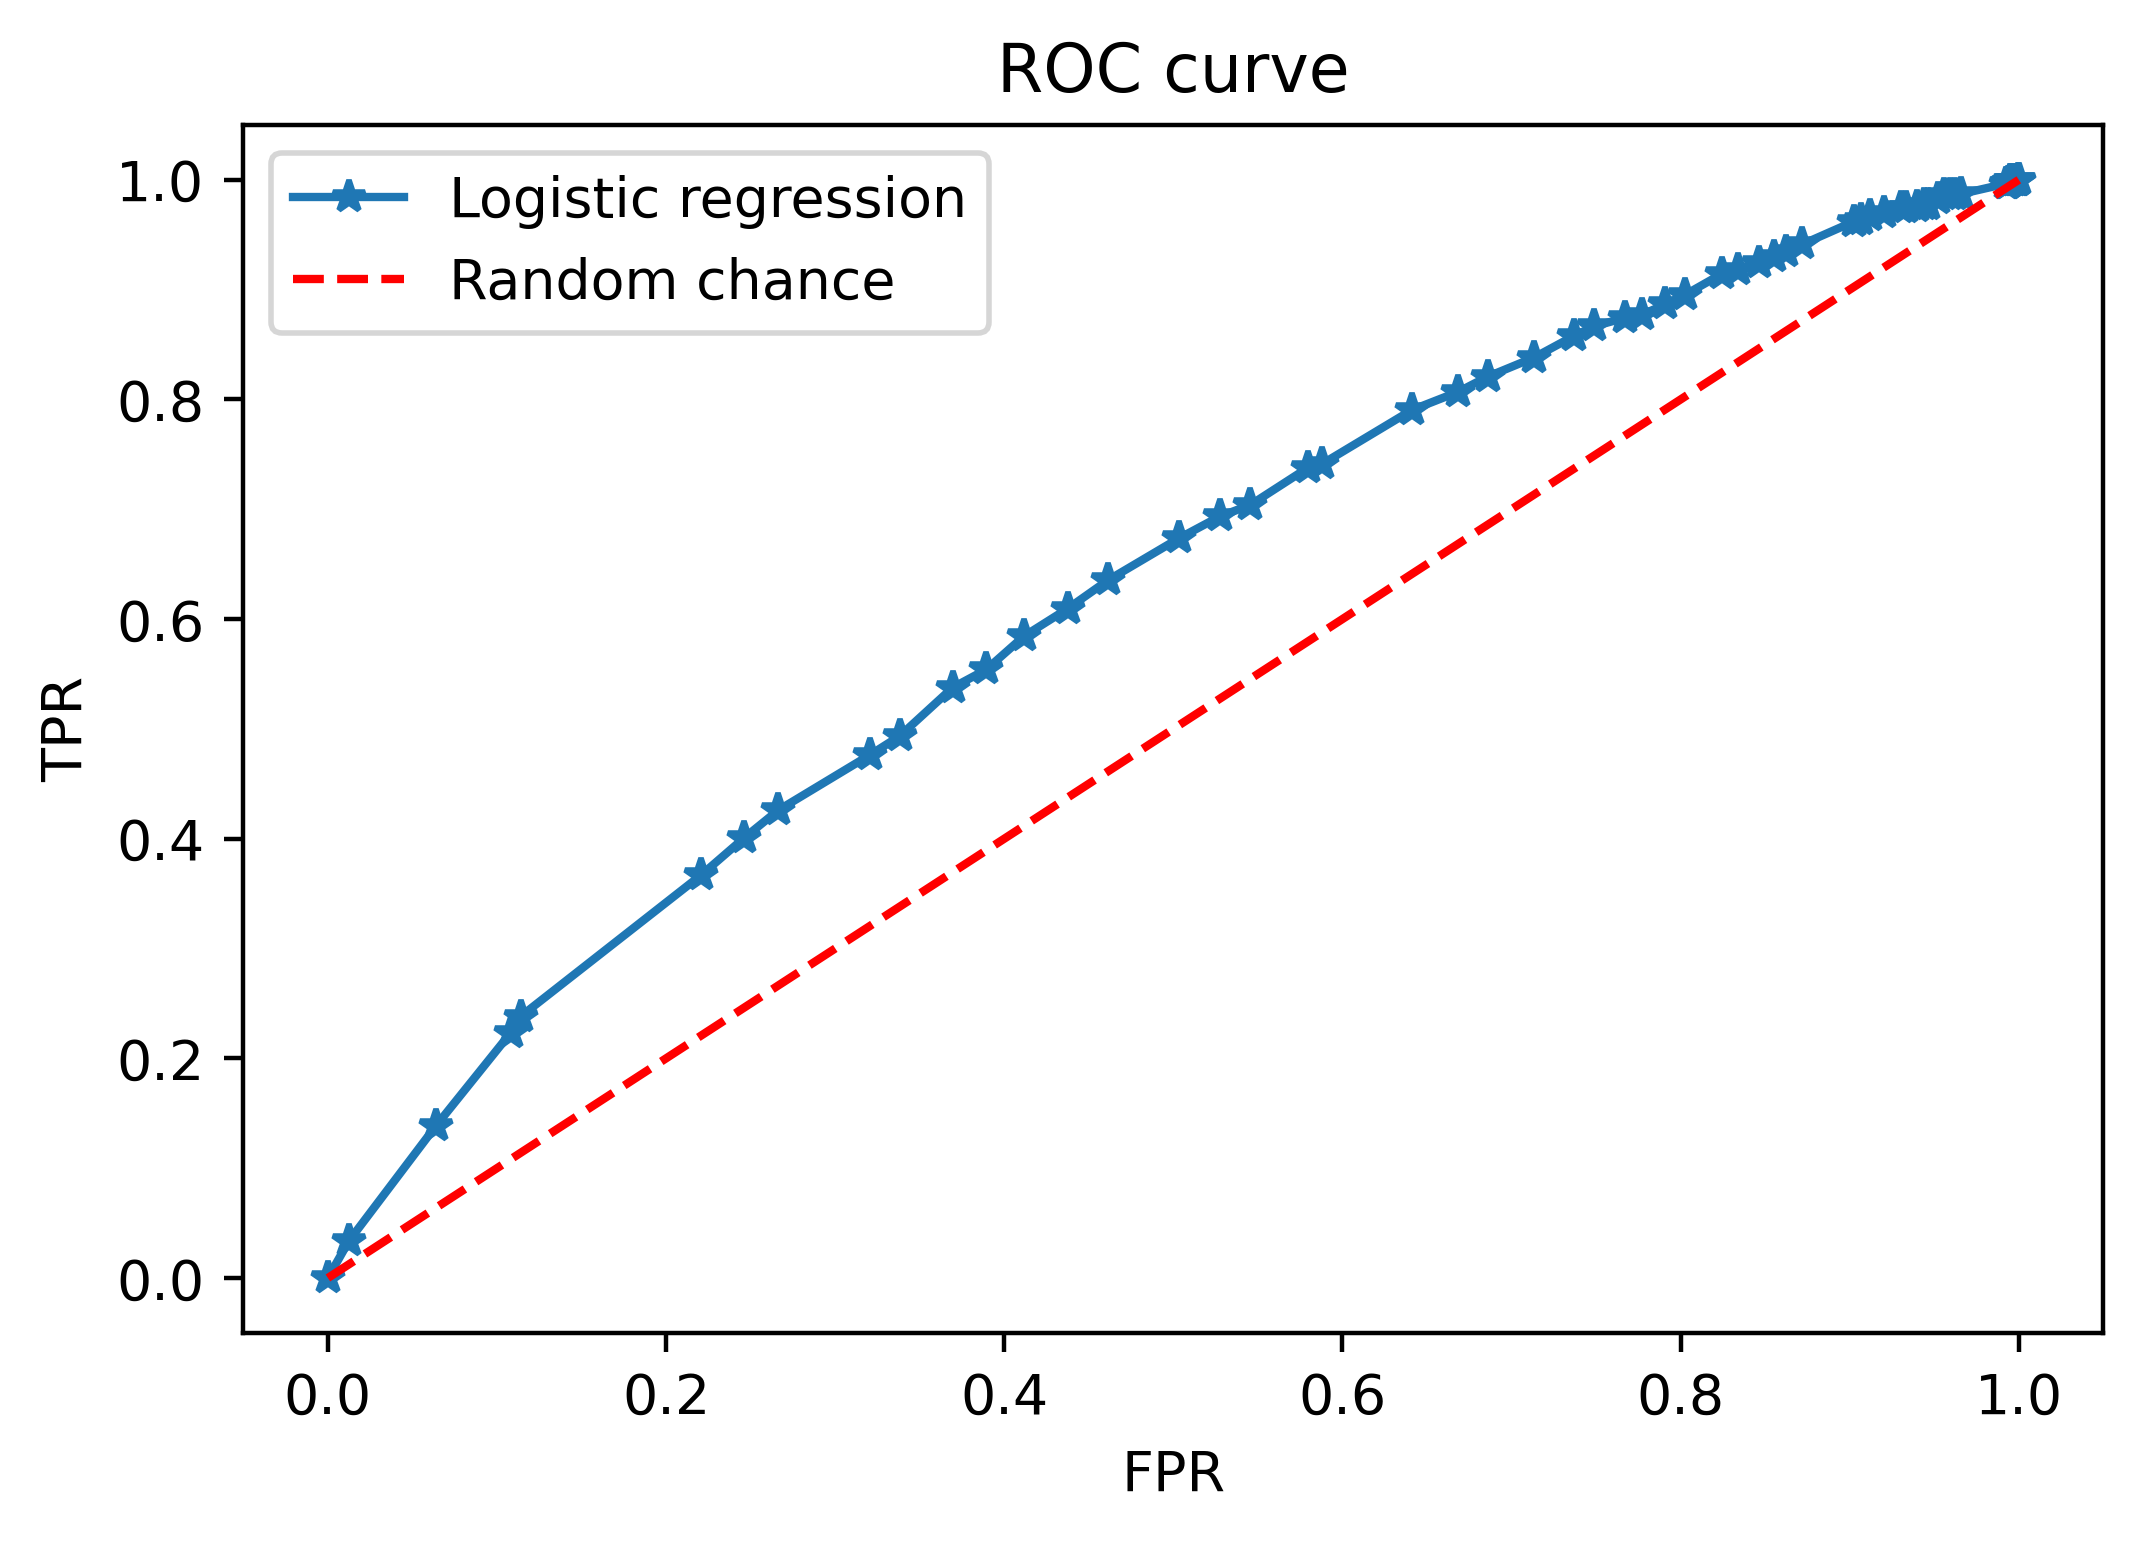

In [31]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y1_test, pos_proba1)
plt.plot(fpr1, tpr1, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [32]:
precision, recall, thresholds = metrics.precision_recall_curve( y1_test, pos_proba1)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


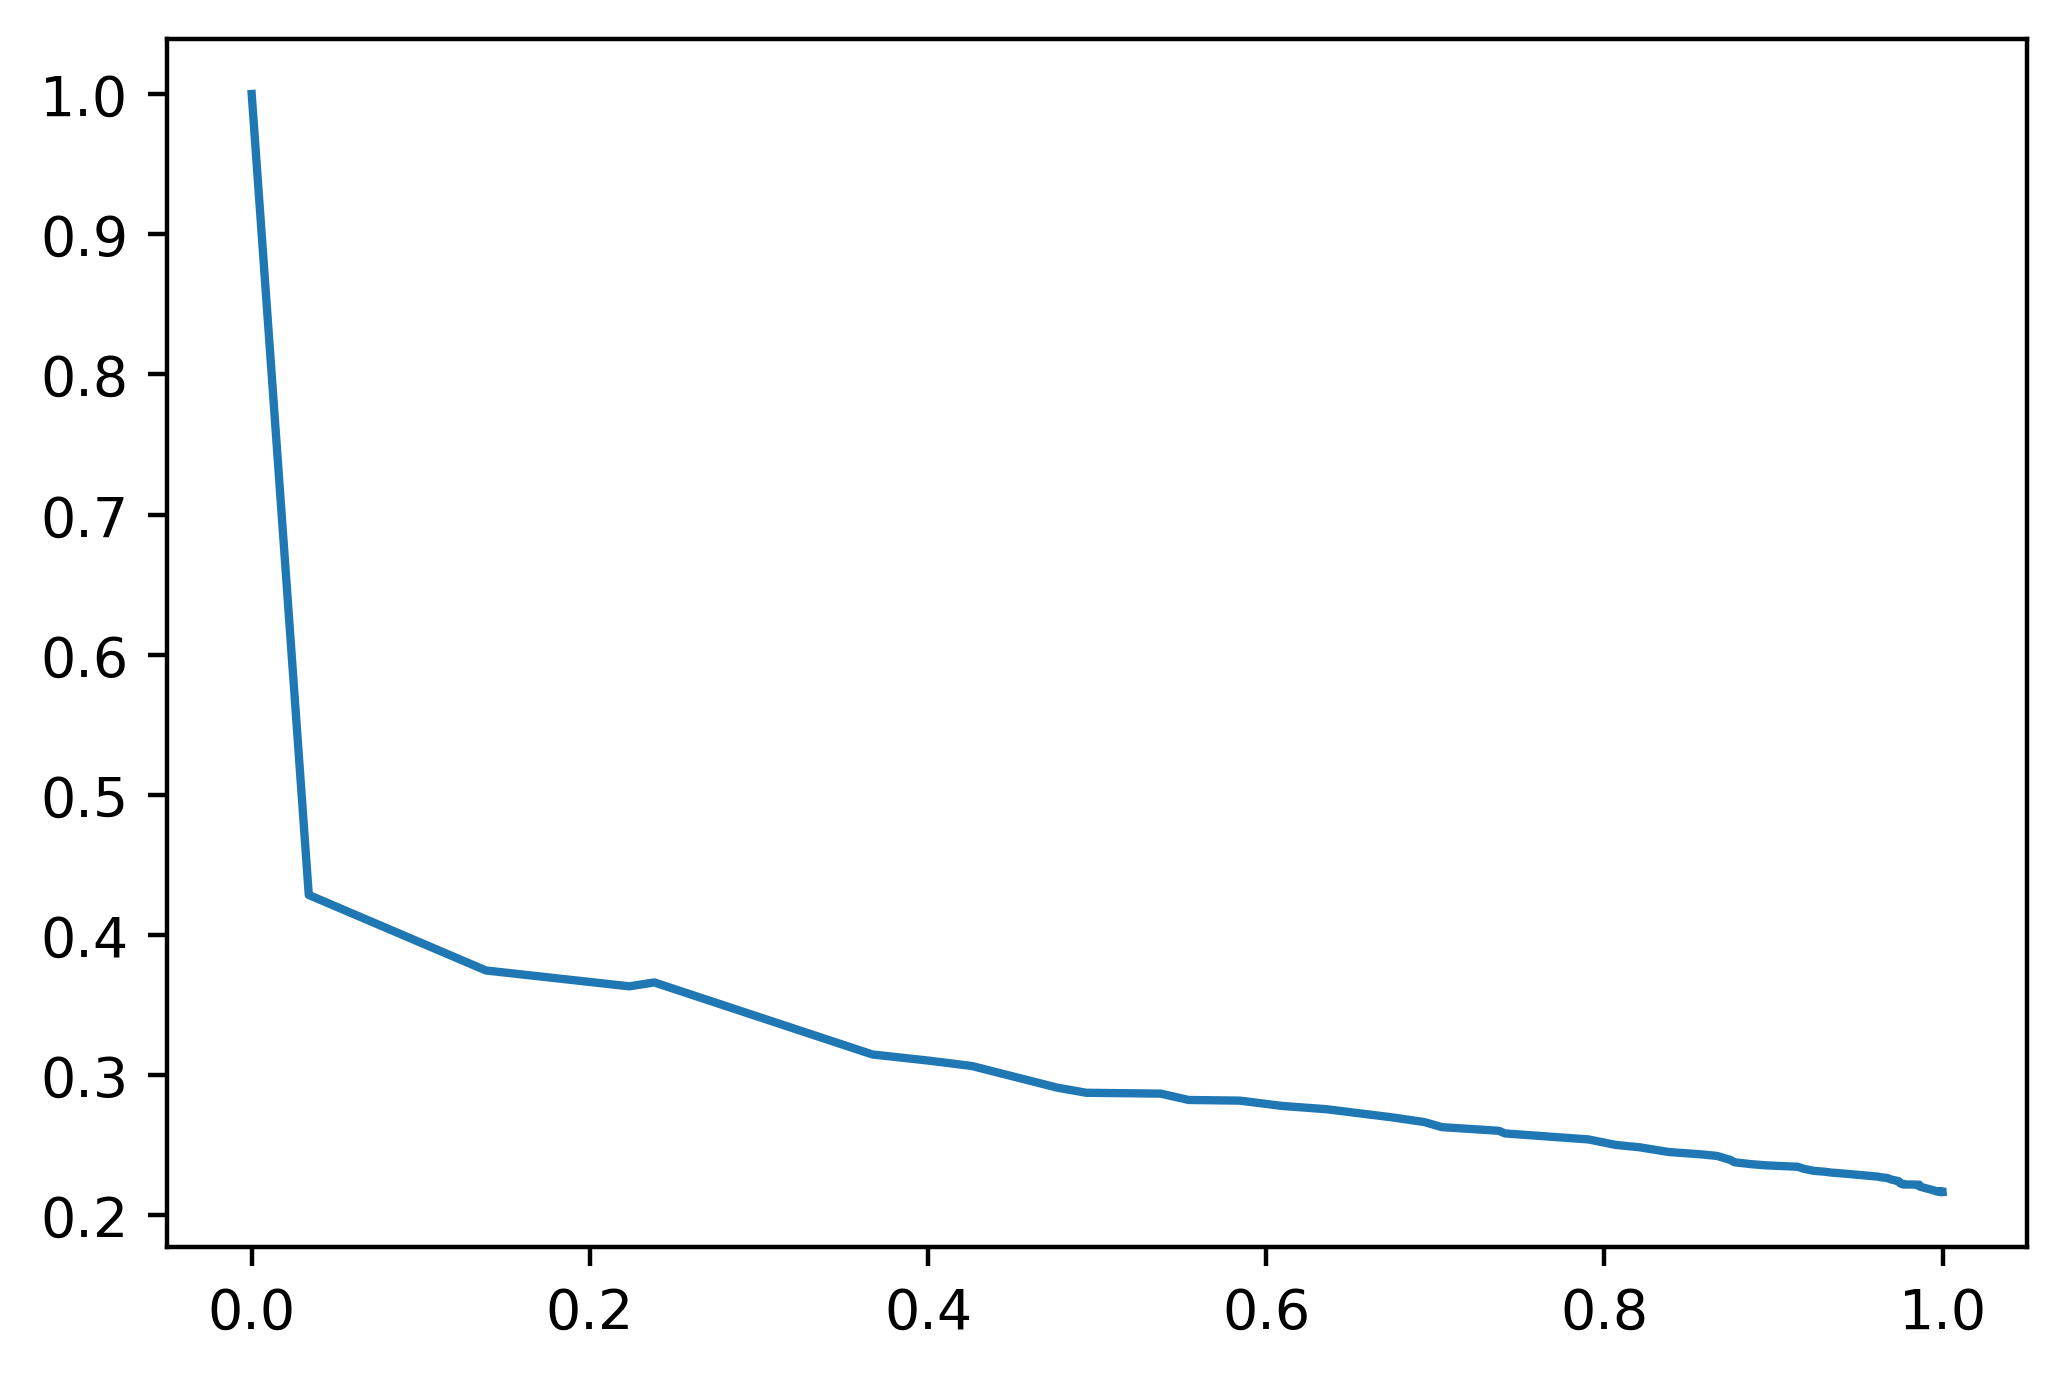

In [33]:
plt.plot(recall,precision)

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [34]:
metrics.auc(recall,precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [35]:
y_pred_proba = my_new_lr1.predict_proba(X1_train)
pos_proba = y_pred_proba[:,1]
metrics.roc_auc_score(y1_train, pos_proba)

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
